In [28]:
import lightkurve as lk

from matplotlib import pyplot as plt

In [2]:
lcs = lk.search_lightcurvefile('KIC 10068307', mission='Kepler', cadence='short')
lcs

#,observation,target_name,productFilename,distance
0,Kepler Quarter 2,kplr010068307,kplr010068307-2009231120729_slc.fits,0.0
1,Kepler Quarter 7,kplr010068307,kplr010068307-2010296114515_slc.fits,0.0
2,Kepler Quarter 7,kplr010068307,kplr010068307-2010326094124_slc.fits,0.0
3,Kepler Quarter 7,kplr010068307,kplr010068307-2010355172524_slc.fits,0.0
4,Kepler Quarter 8,kplr010068307,kplr010068307-2011024051157_slc.fits,0.0
5,Kepler Quarter 8,kplr010068307,kplr010068307-2011053090032_slc.fits,0.0
6,Kepler Quarter 8,kplr010068307,kplr010068307-2011073133259_slc.fits,0.0
7,Kepler Quarter 9,kplr010068307,kplr010068307-2011116030358_slc.fits,0.0
8,Kepler Quarter 9,kplr010068307,kplr010068307-2011145075126_slc.fits,0.0
9,Kepler Quarter 9,kplr010068307,kplr010068307-2011177032512_slc.fits,0.0


In [3]:
lcfc = lcs.download_all()

/Users/ajl573/.virtualenvs/base/lib/python3.7/site-packages/lightkurve/lightcurve.py:702: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


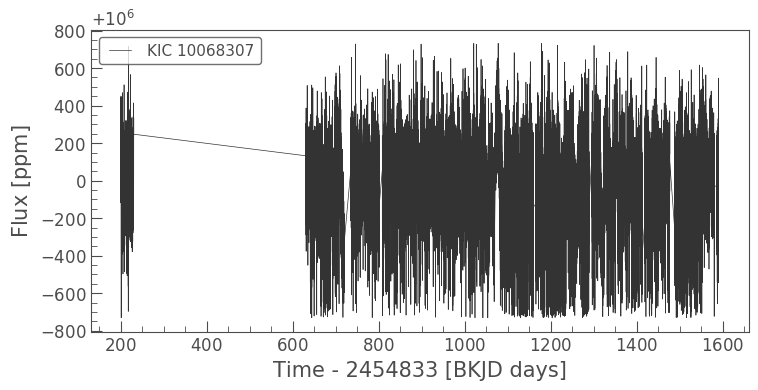

In [14]:
lc = lcfc.PDCSAP_FLUX.stitch().normalize('ppm').remove_nans().remove_outliers()
lc.plot();

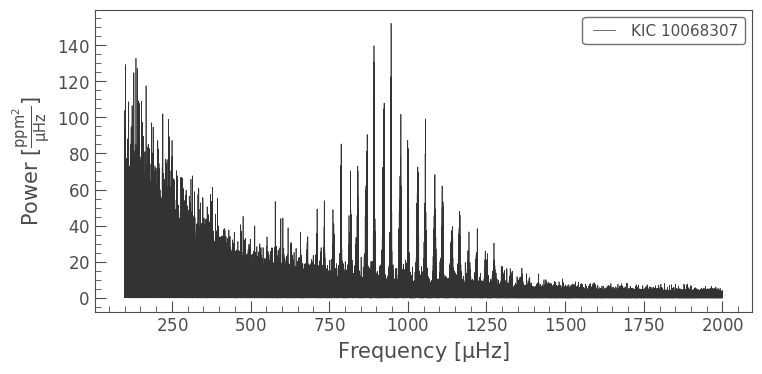

In [18]:
pg = lc.to_periodogram(normalization='psd', maximum_frequency=2000, minimum_frequency=100)
pg.plot();

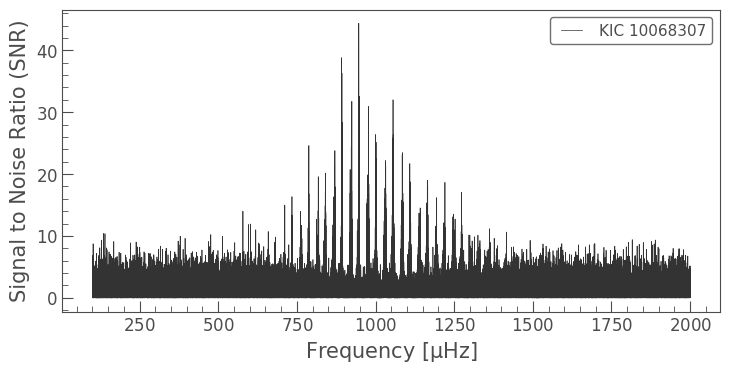

In [20]:
snr = pg.flatten()
snr.plot();

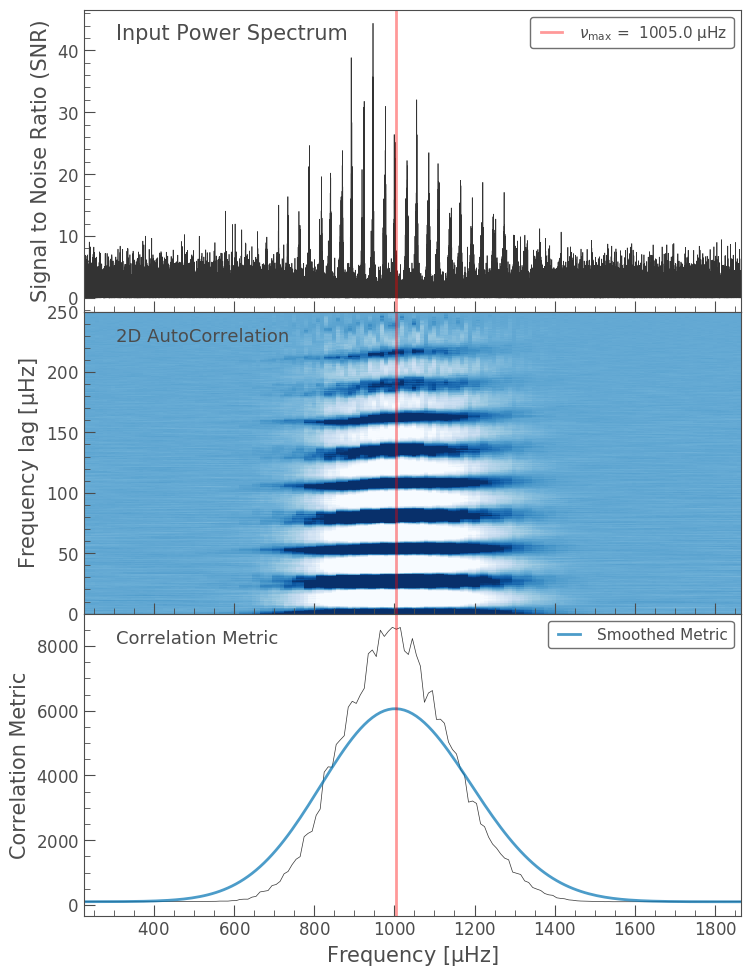

In [23]:
seis = snr.to_seismology()
seis.estimate_numax()
seis.diagnose_numax();

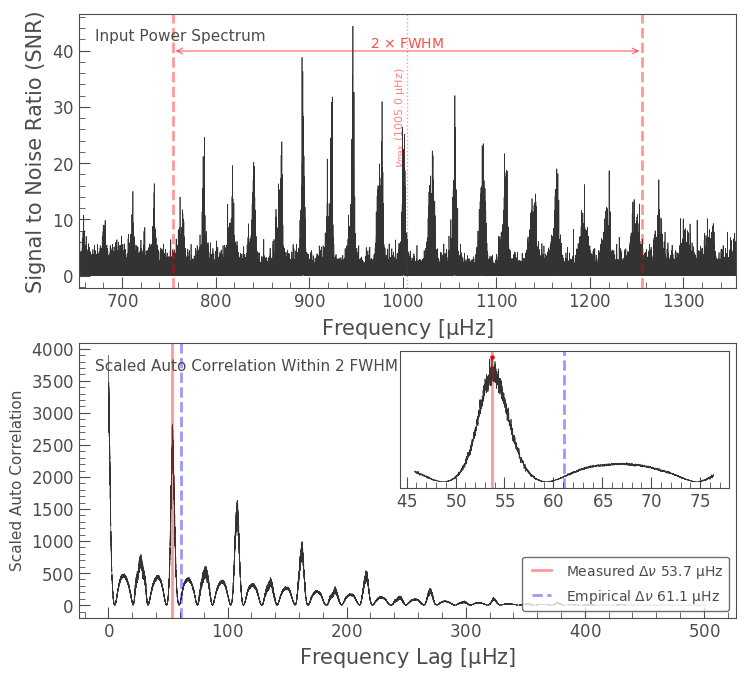

In [24]:
seis.estimate_deltanu()
seis.diagnose_deltanu();

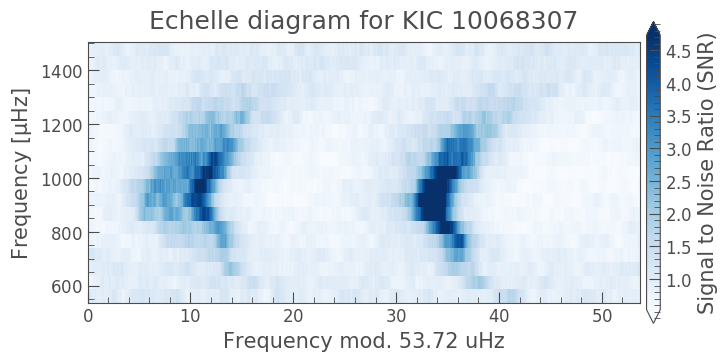

In [38]:
ax = seis.plot_echelle(smooth_filter_width=1.)

plt.savefig('../introduction/images/KIC10068307_echelle.png')